In [8]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [3]:
gmo_data = pd.read_csv('GMO.csv')
gmo_data

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,Divinity Seven♻️🏥,"Las Vegas, NV","UNLV BS Public Administration, M.Ed, USC MSW, ...",False,2022-08-08 22:40:57+00:00,RT @FDAfood: Consumers and healthcare professi...,"['GMOs', 'FeedYourMind']",Twitter for iPhone
1,1,Marco Pino,Panamá,"Promovamos valores en nuestra sociedad, paz y ...",False,2022-08-08 19:36:54+00:00,RT @FDAfood: Consumers and healthcare professi...,"['GMOs', 'FeedYourMind']",Twitter for Android
2,2,FDA_ORA,NaN,Get the latest information from FDA’s Office o...,True,2022-08-08 19:30:12+00:00,RT @FDAfood: Consumers and healthcare professi...,"['GMOs', 'FeedYourMind']",Twitter for iPhone
3,3,FDA FOOD (Ctr for Food Safety & Applied Nutrit...,"College Park, MD","The latest on food safety, outbreaks, recalls,...",True,2022-08-08 18:51:00+00:00,Consumers and healthcare professionals can now...,"['GMOs', 'FeedYourMind']",Twitter Web App
4,4,Dirt To Dinner,"Connecticut, USA",Providing you with a better understanding of f...,False,2022-08-08 18:45:01+00:00,The message from the mainstream scientific and...,"['CRISPR', 'GMOs']",Sprout Social
...,...,...,...,...,...,...,...,...,...
400,400,sse.ndi,NaN,discombobulated fr,False,2022-08-04 12:40:40+00:00,RT @UgandaBIC: Wheat is 1 of the most importan...,NaN,Twitter for iPhone
401,401,Godfrey Asea,Namulonge,My heart is in crops research for development!,False,2022-08-04 12:39:59+00:00,RT @UgandaBIC: Wheat is 1 of the most importan...,NaN,Twitter for iPhone
402,402,NARO-NaCRRI-Namulonge,"27km, Gayaza-Zirobwe road",Uganda's premier crops resources research & de...,False,2022-08-04 12:39:14+00:00,RT @UgandaBIC: Wheat is 1 of the most importan...,NaN,Twitter for iPhone
403,403,UBIC,NaCRRI-Namulonge,Uganda's premier modern Ag-biosciences informa...,False,2022-08-04 12:36:48+00:00,Wheat is 1 of the most important food crops wo...,NaN,Twitter for iPhone


In [6]:
location = np.array(gmo_data['user_location'])
text = np.array(gmo_data['text'])

In [7]:
text_df = pd.DataFrame(gmo_data['text'])
text_df

,text
0,RT @FDAfood: Consumers and healthcare professi...
1,RT @FDAfood: Consumers and healthcare professi...
2,RT @FDAfood: Consumers and healthcare professi...
3,Consumers and healthcare professionals can now...
4,The message from the mainstream scientific and...
...,...
400,RT @UgandaBIC: Wheat is 1 of the most importan...
401,RT @UgandaBIC: Wheat is 1 of the most importan...
402,RT @UgandaBIC: Wheat is 1 of the most importan...
403,Wheat is 1 of the most important food crops wo...


In [9]:
import re

In [10]:
def Preprocessing(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = [w for w in text.split(' ') if w not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(token) for token in text]
    text = [WordNetLemmatizer().lemmatize(token,pos='v') for token in text]
    text = " ".join(text)
    return text

In [11]:
text_df['text'].apply(lambda x:Preprocessing(x))

0      rt fdafood consumer healthcare professional fi...
1      rt fdafood consumer healthcare professional fi...
2      rt fdafood consumer healthcare professional fi...
3      consumer healthcare professional find new mate...
4      message mainstream scientific food security co...
                             ...                        
400    rt ugandabic wheat 1 important food crop world...
401    rt ugandabic wheat 1 important food crop world...
402    rt ugandabic wheat 1 important food crop world...
403    wheat 1 important food crop worldwide global w...
404    way reduce nitrogen use maintain crop yield us...
Name: text, Length: 405, dtype: object

In [12]:
text_df

,text
0,RT @FDAfood: Consumers and healthcare professi...
1,RT @FDAfood: Consumers and healthcare professi...
2,RT @FDAfood: Consumers and healthcare professi...
3,Consumers and healthcare professionals can now...
4,The message from the mainstream scientific and...
...,...
400,RT @UgandaBIC: Wheat is 1 of the most importan...
401,RT @UgandaBIC: Wheat is 1 of the most importan...
402,RT @UgandaBIC: Wheat is 1 of the most importan...
403,Wheat is 1 of the most important food crops wo...


In [13]:
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text

In [14]:
text_df['text'] = np.vectorize(remove_pattern)(text_df['text'], "@[\w]*")

In [16]:
text_df

,text
0,RT : Consumers and healthcare professionals ca...
1,RT : Consumers and healthcare professionals ca...
2,RT : Consumers and healthcare professionals ca...
3,Consumers and healthcare professionals can now...
4,The message from the mainstream scientific and...
...,...
400,RT : Wheat is 1 of the most important food cro...
401,RT : Wheat is 1 of the most important food cro...
402,RT : Wheat is 1 of the most important food cro...
403,Wheat is 1 of the most important food crops wo...


In [17]:
text_df['text'] = text_df['text'].str.replace("[^a-zA-Z#]", " ")
text_df

/var/folders/4m/jxk5_ydd4zl7c_t8ktc70vnw0000gn/T/ipykernel_73631/1602188667.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['text'] = text_df['text'].str.replace("[^a-zA-Z#]", " ")


,text
0,RT Consumers and healthcare professionals ca...
1,RT Consumers and healthcare professionals ca...
2,RT Consumers and healthcare professionals ca...
3,Consumers and healthcare professionals can now...
4,The message from the mainstream scientific and...
...,...
400,RT Wheat is of the most important food cro...
401,RT Wheat is of the most important food cro...
402,RT Wheat is of the most important food cro...
403,Wheat is of the most important food crops wo...


In [18]:
text_df['text'] = text_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_df

,text
0,Consumers healthcare professionals find materi...
1,Consumers healthcare professionals find materi...
2,Consumers healthcare professionals find materi...
3,Consumers healthcare professionals find materi...
4,message from mainstream scientific food securi...
...,...
400,Wheat most important food crops worldwide glob...
401,Wheat most important food crops worldwide glob...
402,Wheat most important food crops worldwide glob...
403,Wheat most important food crops worldwide glob...


In [19]:
tokenized_tweet = text_df['text'].apply(lambda x: x.split())
tokenized_tweet

0      [Consumers, healthcare, professionals, find, m...
1      [Consumers, healthcare, professionals, find, m...
2      [Consumers, healthcare, professionals, find, m...
3      [Consumers, healthcare, professionals, find, m...
4      [message, from, mainstream, scientific, food, ...
                             ...                        
400    [Wheat, most, important, food, crops, worldwid...
401    [Wheat, most, important, food, crops, worldwid...
402    [Wheat, most, important, food, crops, worldwid...
403    [Wheat, most, important, food, crops, worldwid...
404    [reduce, nitrogen, while, maintaining, crop, y...
Name: text, Length: 405, dtype: object

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

text_df['text'] = tokenized_tweet
text_df

,text
0,Consumers healthcare professionals find materi...
1,Consumers healthcare professionals find materi...
2,Consumers healthcare professionals find materi...
3,Consumers healthcare professionals find materi...
4,message from mainstream scientific food securi...
...,...
400,Wheat most important food crops worldwide glob...
401,Wheat most important food crops worldwide glob...
402,Wheat most important food crops worldwide glob...
403,Wheat most important food crops worldwide glob...


In [21]:
food_test = text_df['text']

In [22]:
from keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(food_test)
food_test = tokenizer.texts_to_sequences(food_test)
food_test=pad_sequences(food_test,maxlen=120)
size_of_vocabulary = len(tokenizer.word_index)+1
print("Vocabulary Size: " + str(size_of_vocabulary))

Vocabulary Size: 1009


In [28]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [25]:
food = pd.DataFrame({'text':text_df['text'].values})
food

,text
0,Consumers healthcare professionals find materi...
1,Consumers healthcare professionals find materi...
2,Consumers healthcare professionals find materi...
3,Consumers healthcare professionals find materi...
4,message from mainstream scientific food securi...
...,...
400,Wheat most important food crops worldwide glob...
401,Wheat most important food crops worldwide glob...
402,Wheat most important food crops worldwide glob...
403,Wheat most important food crops worldwide glob...


In [26]:
all_words_positive = ' '.join(text for text in food['text'])

In [27]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

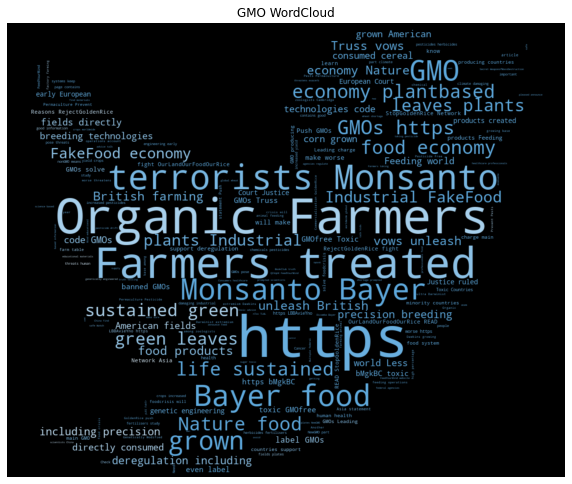

In [29]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('GMO WordCloud')
plt.axis('off')
plt.show()